In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

In [2]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

# 2. model trained with torchvision pretrained model

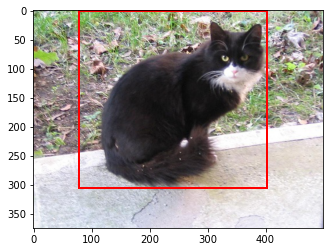

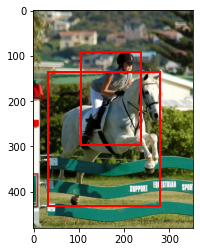

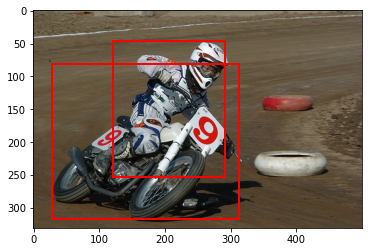

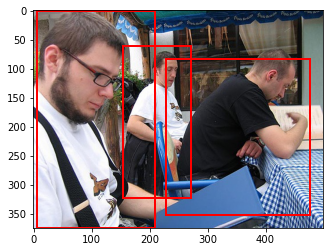

In [3]:
dataset_dir = './dataset/VOCdevkit/VOC2007/JPEGImages/'

for img in ['009956','009957','009960', '009962']:
    img = read_image(dataset_dir+img+'.jpg')
    img = t.from_numpy(img)[None]

    trainer.load('./checkpoints/fasterrcnn_04171725_0.6939748518241238')
    opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
    _bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
    vis_bbox(at.tonumpy(img[0]),
             at.tonumpy(_bboxes[0]),)
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

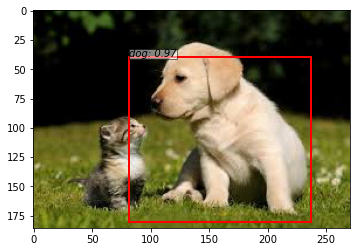

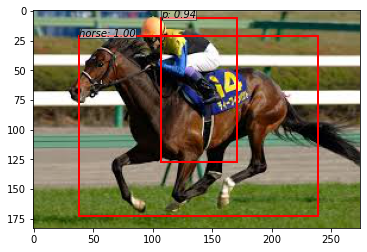

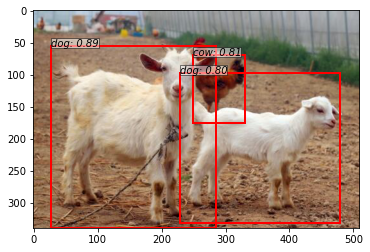

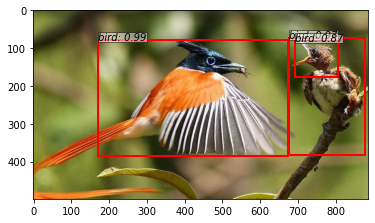

In [4]:
dataset_dir = './dataset/out_of_bag/'

for img in ['1','2','3', '4']:
    img = read_image(dataset_dir+img+'.jpg')
    img = t.from_numpy(img)[None]

    trainer.load('./checkpoints/fasterrcnn_04171725_0.6939748518241238')
    opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
    _bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
    vis_bbox(at.tonumpy(img[0]),
             at.tonumpy(_bboxes[0]),
             at.tonumpy(_labels[0]).reshape(-1),
             at.tonumpy(_scores[0]).reshape(-1))